In [1]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
from matplotlib.pyplot import subplots
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
from scipy import stats
from sklearn import datasets
from IPython.display import display, HTML

In [2]:
pip install ISLP

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.2/349.2 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 812.2/812.2 kB 22.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.8/868.8 kB 30.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.2/94.2 kB 3.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.

In [3]:
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
summarize)

In [4]:
from ISLP import confusion_table
from ISLP.models import contrast
from sklearn.discriminant_analysis import \
(LinearDiscriminantAnalysis as LDA,
QuadraticDiscriminantAnalysis as QDA)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Question 13 This question should be answered using the Weekly data set, which is part of the ISLP package. This data is similar in nature to the Smarket data from this chapter’s lab, except that it contains 1,089 weekly returns for 21 years, from the beginning of 1990 to the end of 2010.



## (a)Produce some numerical and graphical summaries of the Weekly data. Do there appear to be any patterns?

In [5]:
Weekly = load_data('Weekly')

In [ ]:
Weekly.size

9801

In [ ]:
Weekly.columns

Index(['Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume', 'Today',
       'Direction'],
      dtype='object')

In [ ]:
Weekly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1089 entries, 0 to 1088
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Year       1089 non-null   int64   
 1   Lag1       1089 non-null   float64 
 2   Lag2       1089 non-null   float64 
 3   Lag3       1089 non-null   float64 
 4   Lag4       1089 non-null   float64 
 5   Lag5       1089 non-null   float64 
 6   Volume     1089 non-null   float64 
 7   Today      1089 non-null   float64 
 8   Direction  1089 non-null   category
dtypes: category(1), float64(7), int64(1)
memory usage: 69.4 KB


In [ ]:
Weekly.head()

Year   Lag1   Lag2   Lag3   Lag4   Lag5    Volume  Today Direction
0  1990  0.816  1.572 -3.936 -0.229 -3.484  0.154976 -0.270      Down
1  1990 -0.270  0.816  1.572 -3.936 -0.229  0.148574 -2.576      Down
2  1990 -2.576 -0.270  0.816  1.572 -3.936  0.159837  3.514        Up
3  1990  3.514 -2.576 -0.270  0.816  1.572  0.161630  0.712        Up
4  1990  0.712  3.514 -2.576 -0.270  0.816  0.153728  1.178        Up

In [ ]:
temp = Weekly.copy()
tmp = temp.drop(['Direction'], axis = 1)
tmp

Year   Lag1   Lag2   Lag3   Lag4   Lag5    Volume  Today
0     1990  0.816  1.572 -3.936 -0.229 -3.484  0.154976 -0.270
1     1990 -0.270  0.816  1.572 -3.936 -0.229  0.148574 -2.576
2     1990 -2.576 -0.270  0.816  1.572 -3.936  0.159837  3.514
3     1990  3.514 -2.576 -0.270  0.816  1.572  0.161630  0.712
4     1990  0.712  3.514 -2.576 -0.270  0.816  0.153728  1.178
...    ...    ...    ...    ...    ...    ...       ...    ...
1084  2010 -0.861  0.043 -2.173  3.599  0.015  3.205160  2.969
1085  2010  2.969 -0.861  0.043 -2.173  3.599  4.242568  1.281
1086  2010  1.281  2.969 -0.861  0.043 -2.173  4.835082  0.283
1087  2010  0.283  1.281  2.969 -0.861  0.043  4.454044  1.034
1088  2010  1.034  0.283  1.281  2.969 -0.861  2.707105  0.069

[1089 rows x 8 columns]

In [ ]:
tmp.corr()

Year      Lag1      Lag2      Lag3      Lag4      Lag5    Volume  \
Year    1.000000 -0.032289 -0.033390 -0.030006 -0.031128 -0.030519  0.841942   
Lag1   -0.032289  1.000000 -0.074853  0.058636 -0.071274 -0.008183 -0.064951   
Lag2   -0.033390 -0.074853  1.000000 -0.075721  0.058382 -0.072499 -0.085513   
Lag3   -0.030006  0.058636 -0.075721  1.000000 -0.075396  0.060657 -0.069288   
Lag4   -0.031128 -0.071274  0.058382 -0.075396  1.000000 -0.075675 -0.061075   
Lag5   -0.030519 -0.008183 -0.072499  0.060657 -0.075675  1.000000 -0.058517   
Volume  0.841942 -0.064951 -0.085513 -0.069288 -0.061075 -0.058517  1.000000   
Today  -0.032460 -0.075032  0.059167 -0.071244 -0.007826  0.011013 -0.033078   

           Today  
Year   -0.032460  
Lag1   -0.075032  
Lag2    0.059167  
Lag3   -0.071244  
Lag4   -0.007826  
Lag5    0.011013  
Volume -0.033078  
Today   1.000000

### Patern - Numerical

There seems to be a pattern between Volume and Year. We see it has a high correlation at 0.842.

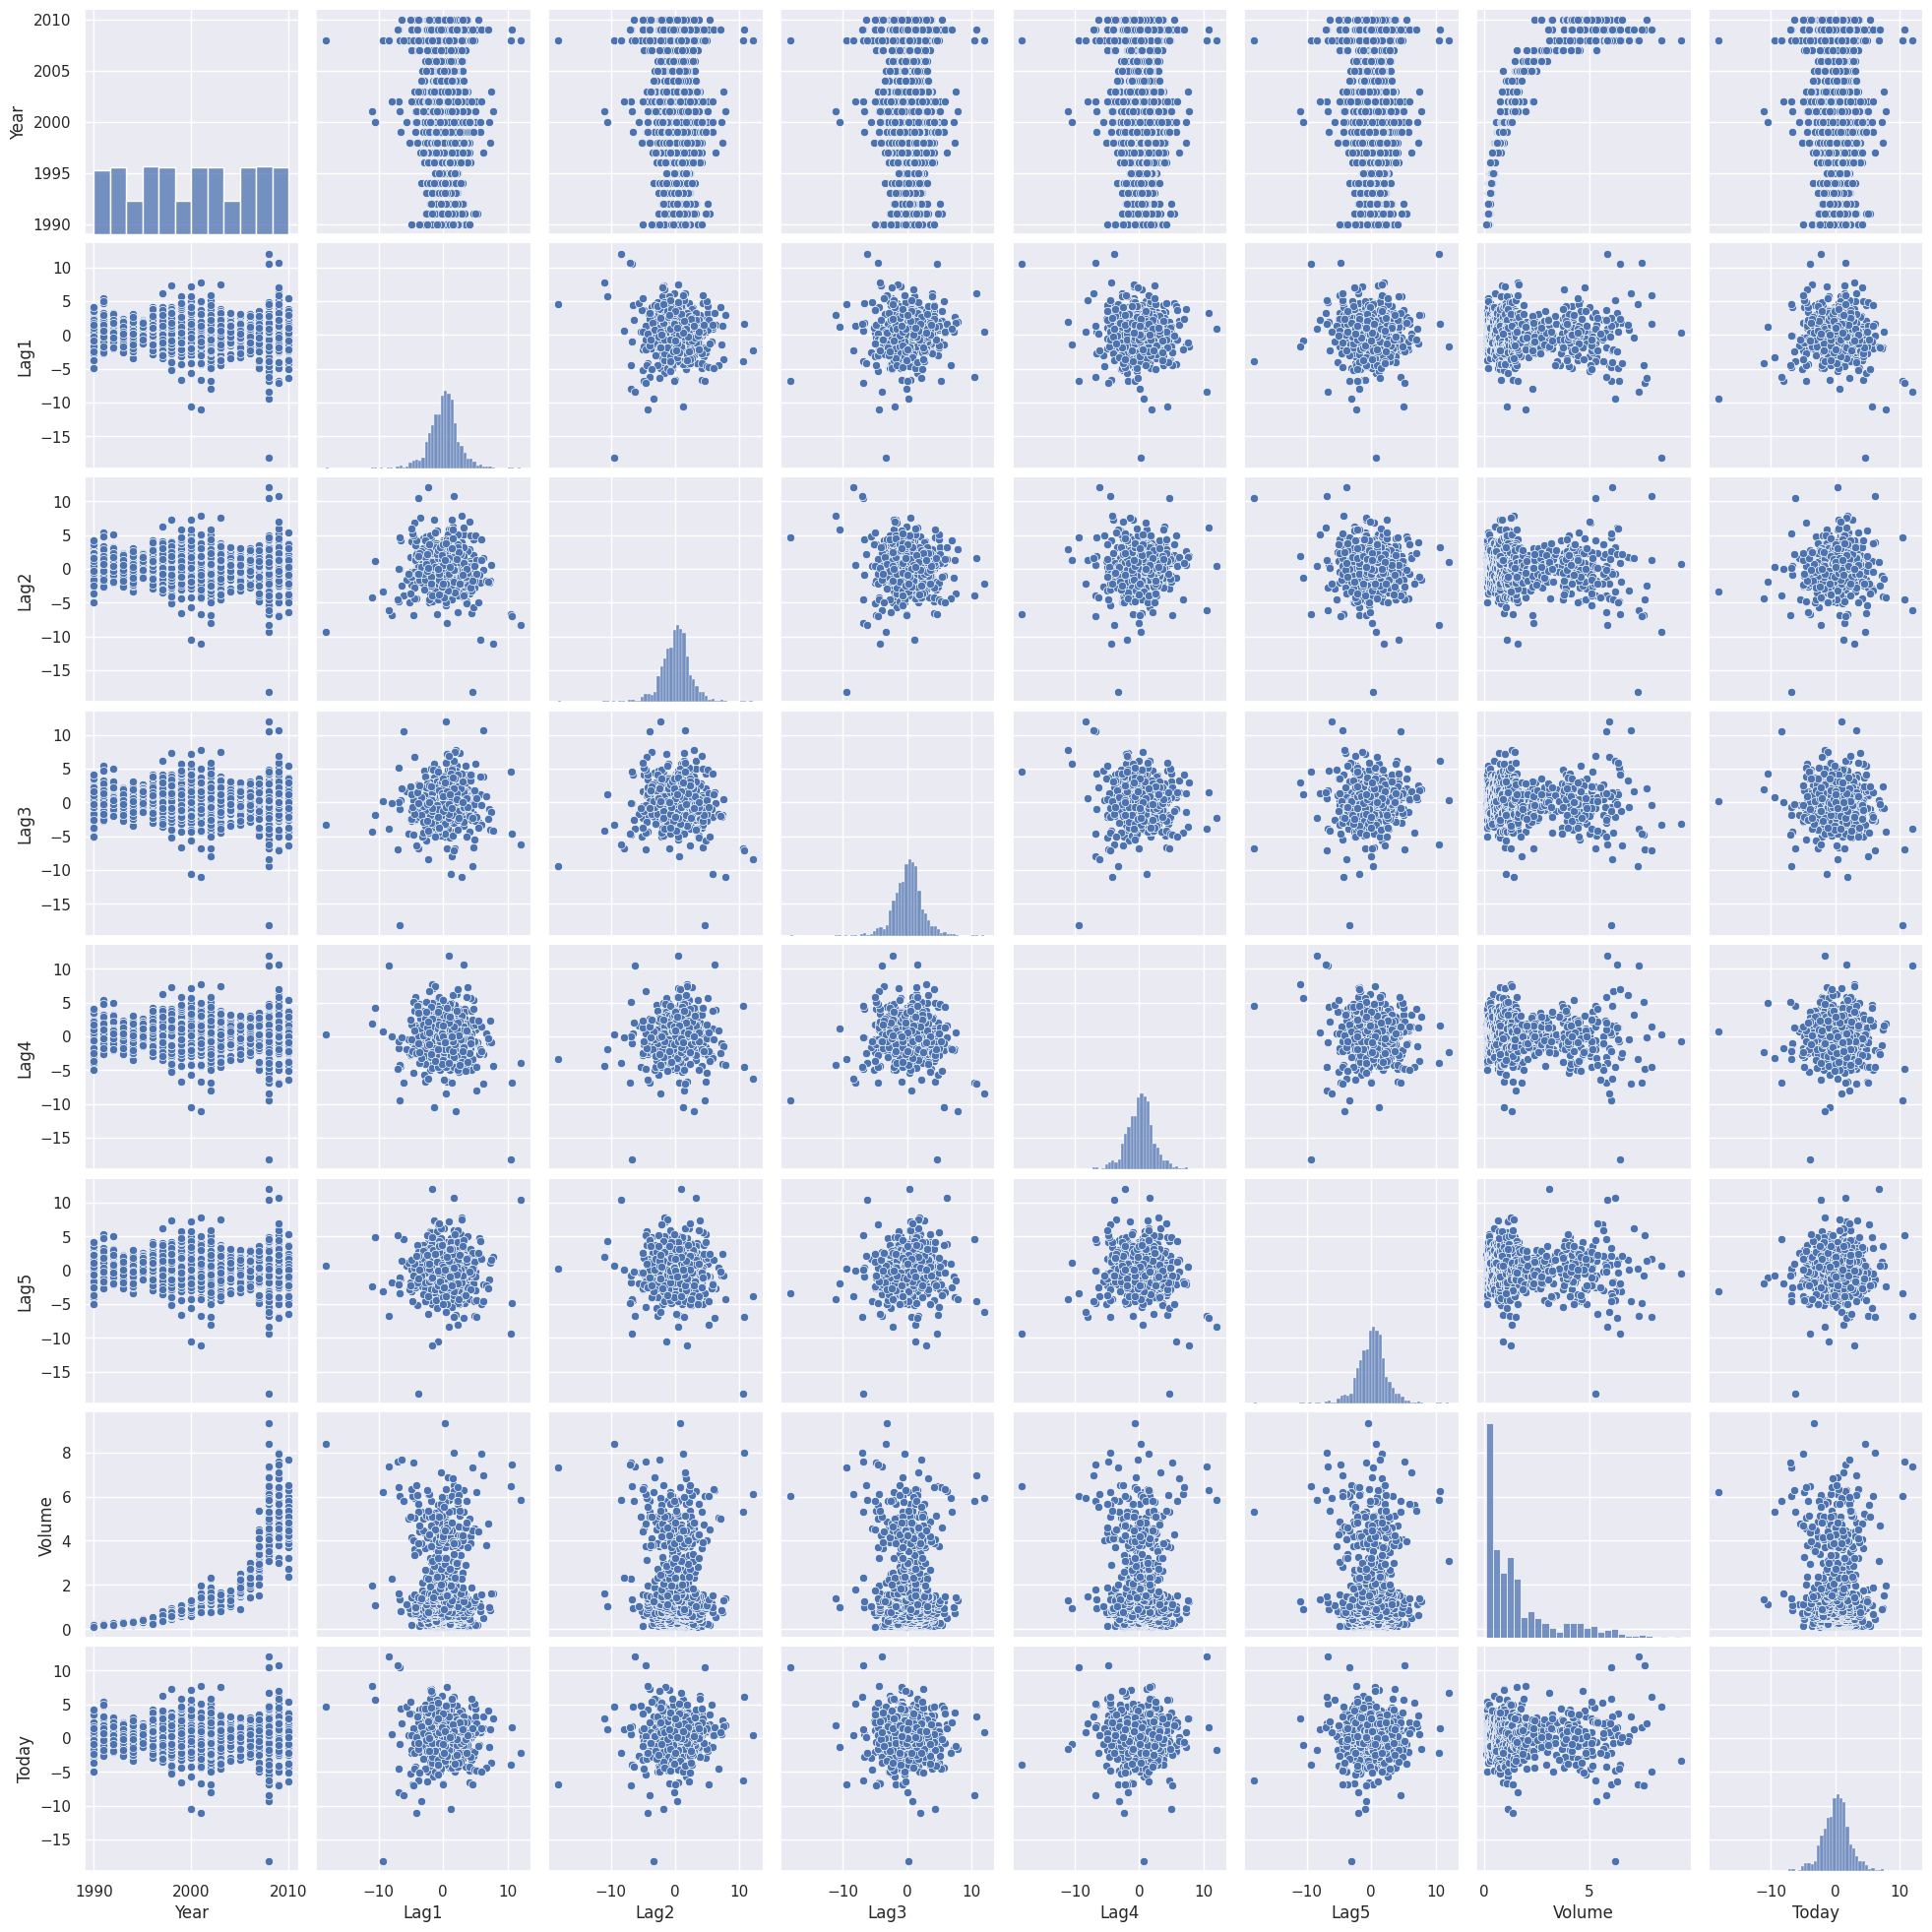

In [ ]:
sns.pairplot(tmp)

### Patern - Graph

We see an $X^{2}$ correlation with Volume and Year, which we predicted there was a relationship with the data.

There might also be a relationship between everything and year. It seems constant as the years go on there is roughly the same amount of stock market returns.

## (b) - Use the full data set to perform a logistic regression with Direction as the response and the five lag variables plus Volume as predictors. Use the summary function to print the results. Do any of the predictors appear to be statistically significant? If so, which ones?

In [ ]:
allvars = Weekly.columns.drop(['Year', 'Today', 'Direction'])
design = MS(allvars)
X = design.fit_transform(Weekly)
y = Weekly.Direction == 'Up'

In [ ]:
glm = sm.GLM(y,X, family = sm.families.Binomial())
results = glm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Direction   No. Observations:                 1089
Model:                            GLM   Df Residuals:                     1082
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -743.18
Date:                Tue, 18 Jun 2024   Deviance:                       1486.4
Time:                        22:02:22   Pearson chi2:                 1.09e+03
No. Iterations:                     4   Pseudo R-squ. (CS):           0.009000
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.2669      0.086      3.106      0.002       0.098       0.435
Lag1          -0.0413      0.026     -1.563      0.118      -0.093       0.010
Lag2           0.0584      0.027      2.175      0.030       0.006       0.111
Lag3          -0.0161      0.027     -0.602      0.547      -0.068       0.036
Lag4          -0.0278      0.026     -1.050      0.294      -0.080       0.024
Lag5          -0.0145      0.026     -0.549      0.583      -0.066       0.037
Volume        -0.0227      0.037     -0.616      0.538      -0.095       0.050
==============================================================================
"""

### Results

We can see the only significant p value would be Lag2. It is the only one below 0.05.

## (c) -  Compute the confusion matrix and overall fraction of correct predictions. Explain what the confusion matrix is telling you about the types of mistakes made by logistic regression.

In [ ]:
probs = results.predict()
probs


array([0.60862494, 0.60103144, 0.58756995, ..., 0.57972297, 0.55091703,
       0.52212163])

In [ ]:
Weekly.Direction.shape

(1089,)

In [ ]:
labels = np.array(['Down'] * 1089)
labels[probs >0.5] = "Up"


In [ ]:
confusion_table(labels, Weekly.Direction)

Truth      Down   Up
Predicted           
Down         54   48
Up          430  557

### Results - Confusion Matrix

We predicted that the market would go up 557 correctly and 430 times incorrectly. So 557/ (430 + 557) = 56.4 %.

Total of 557 + 48 Up values = 605

Total of 54 + 430 Down values = 484

Total Predicted up Values = 987

Total Predicted down Values = 102

Data Prediction for Up 605/ (605 + 484) = 55.55 % baseline

Data Correction for all prediction (557 + 54) / (605 + 484) = 56.1 %

Data Correct Down Prediction 484 /(605 + 484) = 44.44 baseline

Data guessing for up prediction = 557 / 605 = 90.5 %

Data guessing for down prediction = 54 / 484 = 11.5 %



### Results - understanding

We see the overall prediction for our model is 56.1 %. It is not much better than the 55.55 % baseline if we just gussed 'up' for everything.

Next we see we rarely correctly predict 'down' as it is 11.5 %.

However we over predict up at 90.5 % accurate. So our model has several problems.

## (d) -Now fit the logistic regression model using a training data period from 1990 to 2008, with Lag2 as the only predictor. Compute the confusion matrix and the overall fraction of correct predictions for the held out data (that is, the data from 2009 and 2010).

In [ ]:
Weekly.head()


Year   Lag1   Lag2   Lag3   Lag4   Lag5    Volume  Today Direction
0  1990  0.816  1.572 -3.936 -0.229 -3.484  0.154976 -0.270      Down
1  1990 -0.270  0.816  1.572 -3.936 -0.229  0.148574 -2.576      Down
2  1990 -2.576 -0.270  0.816  1.572 -3.936  0.159837  3.514        Up
3  1990  3.514 -2.576 -0.270  0.816  1.572  0.161630  0.712        Up
4  1990  0.712  3.514 -2.576 -0.270  0.816  0.153728  1.178        Up

In [ ]:
Weekly.Year.min()

1990

In [ ]:
Weekly.Year.max()

2010

In [6]:
train = Weekly[Weekly['Year'] <= 2008]
test = Weekly[Weekly['Year'] > 2008]

X_train, y_train = train['Lag2'], train['Direction']
X_test, y_test = test['Lag2'], test['Direction']

In [ ]:
lr = LogisticRegression()
lr.fit(X_train.to_frame(), y_train)

LogisticRegression()

In [ ]:
print(X_test.shape)
probs = lr.predict(X_test.to_frame())
probs

(104,)


array(['Up', 'Up', 'Down', 'Down', 'Up', 'Up', 'Up', 'Down', 'Down',
       'Down', 'Down', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up',
       'Up', 'Down', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up',
       'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up',
       'Up', 'Up', 'Up', 'Down', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up',
       'Up', 'Up', 'Up', 'Up', 'Down', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up',
       'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Down', 'Up',
       'Down', 'Up', 'Up', 'Up', 'Up', 'Down', 'Down', 'Up', 'Up', 'Up',
       'Up', 'Up', 'Down', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up',
       'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up'],
      dtype=object)

In [ ]:
probs = lr.predict(X_test.to_frame())
confusion_table(probs, y_test)


Truth      Down  Up
Predicted          
Down          9   5
Up           34  56

### Results - Confusion Table

Total Accuracy : 56 + 9 / (56 + 9 + 34 + 5) = .625

Baseline Accuracy: 61 /(56 + 9 + 34 + 5) = .5865

Prediction Accuracy for Up : 56 / 61 = .918

Prediction Accuracy for Down: 9/ 43 = .209

### Results - Explained

We can see our Total Accuracy rose but so did our baseline accuracy. We are at a 4 % increase which is better than 1 % from using all the data.

Our up prediction went slightly up by 1 % and our down percentage went up by almost 10 %.

Overall, this is a more accurate model but it is still inaccurate.

## (e) - Repeat (d) using LDA.

In [ ]:
lda = LDA()
lda.fit(X_train.to_frame(),y_train)

LinearDiscriminantAnalysis()

In [ ]:
probs = lda.predict(X_test.to_frame())
confusion_table(probs, y_test)

Truth      Down  Up
Predicted          
Down          9   5
Up           34  56

### Results - Confusion Matrix

It is the same table as before so there isn't a difference between logistic regression and LDA


## (f) - Repeat using QDA

In [ ]:
qda = QDA()
qda.fit(X_train.to_frame(), y_train)

QuadraticDiscriminantAnalysis()

In [ ]:
pred = qda.predict(X_test.to_frame())
confusion_table(pred, y_test)

Truth      Down  Up
Predicted          
Down          0   0
Up           43  61

### Results - Confusion Matrix

Total Accuracy of the Table = 61/ 104 = .5865

Baseline Accuracy  = 61 / 104 = .5865



### Results - Explained

There isn't a different between the baseline and the accuracy of the table so QDA is not a reliable estimation. LDA and logistic regression are the best so far

## (g) - Repeat using KNN with n = 1

In [ ]:
knn_1 = KNeighborsClassifier(n_neighbors = 1)
knn_1.fit(X_train.to_frame(), y_train)


KNeighborsClassifier(n_neighbors=1)

In [ ]:
pred = knn_1.predict(X_test.to_frame())
confusion_table(pred, y_test)

Truth      Down  Up
Predicted          
Down         22  32
Up           21  29

### Results - Confusion Table

Total Correct Predictions = 41/ 41 + 32 + 21 = 48.8%

Total Baseline Predictions = 61 / 61+ 22 + 21 = 58.65 %

### Results - Described

We can say that the baseline prediction is way higher so this isn't a great method.

## (h) Repeat (d) with niave bayes


In [ ]:
NB = GaussianNB()
NB.fit(X_train.to_frame(), y_train)

GaussianNB()

In [ ]:
preds = NB.predict(X_test.to_frame())
confusion_table(preds, y_test)

Truth      Down  Up
Predicted          
Down          0   0
Up           43  61

### Results - Confusion Table

This is the exact same results as QDA which wasn't a great fit

## (i) Which of these methods appears to provide the best results on this data?

The best results occurred from logistic regression and LDA. These both had the exact same results around 4 % better than the baseline.

The parametric methods like QDA, KNN, and bayes did not perform well. They were either the exact same as the baseline or worse than the baseline

## (j) Experiment with diferent combinations of predictors, including possible transformations and interactions, for each of the methods. Report the variables, method, and associated confusion matrix that appears to provide the best results on the held out data. Note that you should also experiment with values for K in the KNN classifer.

In [ ]:
for i in range(1,10):
  knn = KNeighborsClassifier(n_neighbors = i)
  knn.fit(X_train.to_frame(), y_train)
  pred = knn.predict(X_test.to_frame())
  print(confusion_table(pred, y_test))


Truth      Down  Up
Predicted          
Down         22  32
Up           21  29
Truth      Down  Up
Predicted          
Down         31  44
Up           12  17
Truth      Down  Up
Predicted          
Down         16  19
Up           27  42
Truth      Down  Up
Predicted          
Down         26  27
Up           17  34
Truth      Down  Up
Predicted          
Down         16  21
Up           27  40
Truth      Down  Up
Predicted          
Down         20  28
Up           23  33
Truth      Down  Up
Predicted          
Down         16  20
Up           27  41
Truth      Down  Up
Predicted          
Down         21  25
Up           22  36
Truth      Down  Up
Predicted          
Down         17  20
Up           26  41


### Results - KNN

The best result is for k_neighbors = 3. This has a prediction rate of 40 correct, which is the highest!

In [25]:
train['interactive1']=  train['Lag1'] * train['Lag2']
test['interactive1'] = test['Lag1'] * test['Lag2']

X_train, X_test = train[['interactive1', 'Lag2']], test[['interactive1', 'Lag2']]
y_train, y_test = train['Direction'].map({'Down':0, 'Up': 1}), test['Direction'].map({'Down':0, 'Direction': 1})

<ipython-input-25-be5010353168>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['interactive1']=  train['Lag1'] * train['Lag2']
<ipython-input-25-be5010353168>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['interactive1'] = test['Lag1'] * test['Lag2']


In [16]:
X_train.head()

interactive1   Lag2
0      1.282752  1.572
1     -0.220320  0.816
2      0.695520 -0.270
3     -9.052064 -2.576
4      2.501968  3.514

In [19]:
logit = LogisticRegression()
model_logit = logit.fit(X_train, y_train)

In [23]:
pred = model_logit.predict(X_test)
confusion_table(pred, y_test)


Truth      Down  Up
Predicted          
Down          3   3
Up           40  58

### Results: Compound Variables

61 correct this is the highest yet and higher than all the KNN numbers.

In [27]:
results = sm.Logit(y_train,sm.add_constant(X_train)).fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.685139
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Direction   No. Observations:                  985
Model:                          Logit   Df Residuals:                      982
Method:                           MLE   Df Model:                            2
Date:                Thu, 20 Jun 2024   Pseudo R-squ.:                0.003681
Time:                        05:12:38   Log-Likelihood:                -674.86
converged:                       True   LL-Null:                       -677.35
Covariance Type:            nonrobust   LLR p-value:                   0.08265
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2058      0.064      3.197      0.001       0.080       0.332
interactive1     0.0061      0.007      0.886      0.376      -0.007       0.020
Lag2             0.0566      0.029      1.949      0.051      -0.000       0.113
================================================================================
"""

### Results Futher Examined

However we see the P value for the new interactive term is high. It appears our model predicted better, but it was most likely random since the variable isn't impactful.

# Question 14 -  In this problem, you will develop a model to predict whether a given car gets high or low gas mileage based on the Auto data set.


## (a) - Create a binary variable, mpg01, that contains a 1 if mpg contains a value above its median, and a 0 if mpg contains a value below its median. You can compute the median using the median() method of the data frame. Note you may fnd it helpful to add a column mpg01 to the data frame by assignment.

In [6]:
Auto = load_data('Auto')

In [7]:
Auto.head()

mpg  cylinders  displacement  horsepower  weight  \
name                                                                           
chevrolet chevelle malibu  18.0          8         307.0         130    3504   
buick skylark 320          15.0          8         350.0         165    3693   
plymouth satellite         18.0          8         318.0         150    3436   
amc rebel sst              16.0          8         304.0         150    3433   
ford torino                17.0          8         302.0         140    3449   

                           acceleration  year  origin  
name                                                   
chevrolet chevelle malibu          12.0    70       1  
buick skylark 320                  11.5    70       1  
plymouth satellite                 11.0    70       1  
amc rebel sst                      12.0    70       1  
ford torino                        10.5    70       1

In [8]:
Auto.mpg.median()

22.75

In [16]:
Auto['mpg01'] = np.where(Auto['mpg'] > Auto['mpg'].median(), 1, 0)
Auto['mpg01']

name
chevrolet chevelle malibu    0
buick skylark 320            0
plymouth satellite           0
amc rebel sst                0
ford torino                  0
                            ..
ford mustang gl              1
vw pickup                    1
dodge rampage                1
ford ranger                  1
chevy s-10                   1
Name: mpg01, Length: 392, dtype: int64

## (b) - Explore the data graphically in order to investigate the association between mpg01 and the other features. Which of the other features seem most likely to be useful in predicting mpg01? Scatterplots and boxplots may be useful tools to answer this question. Describe your fndings.

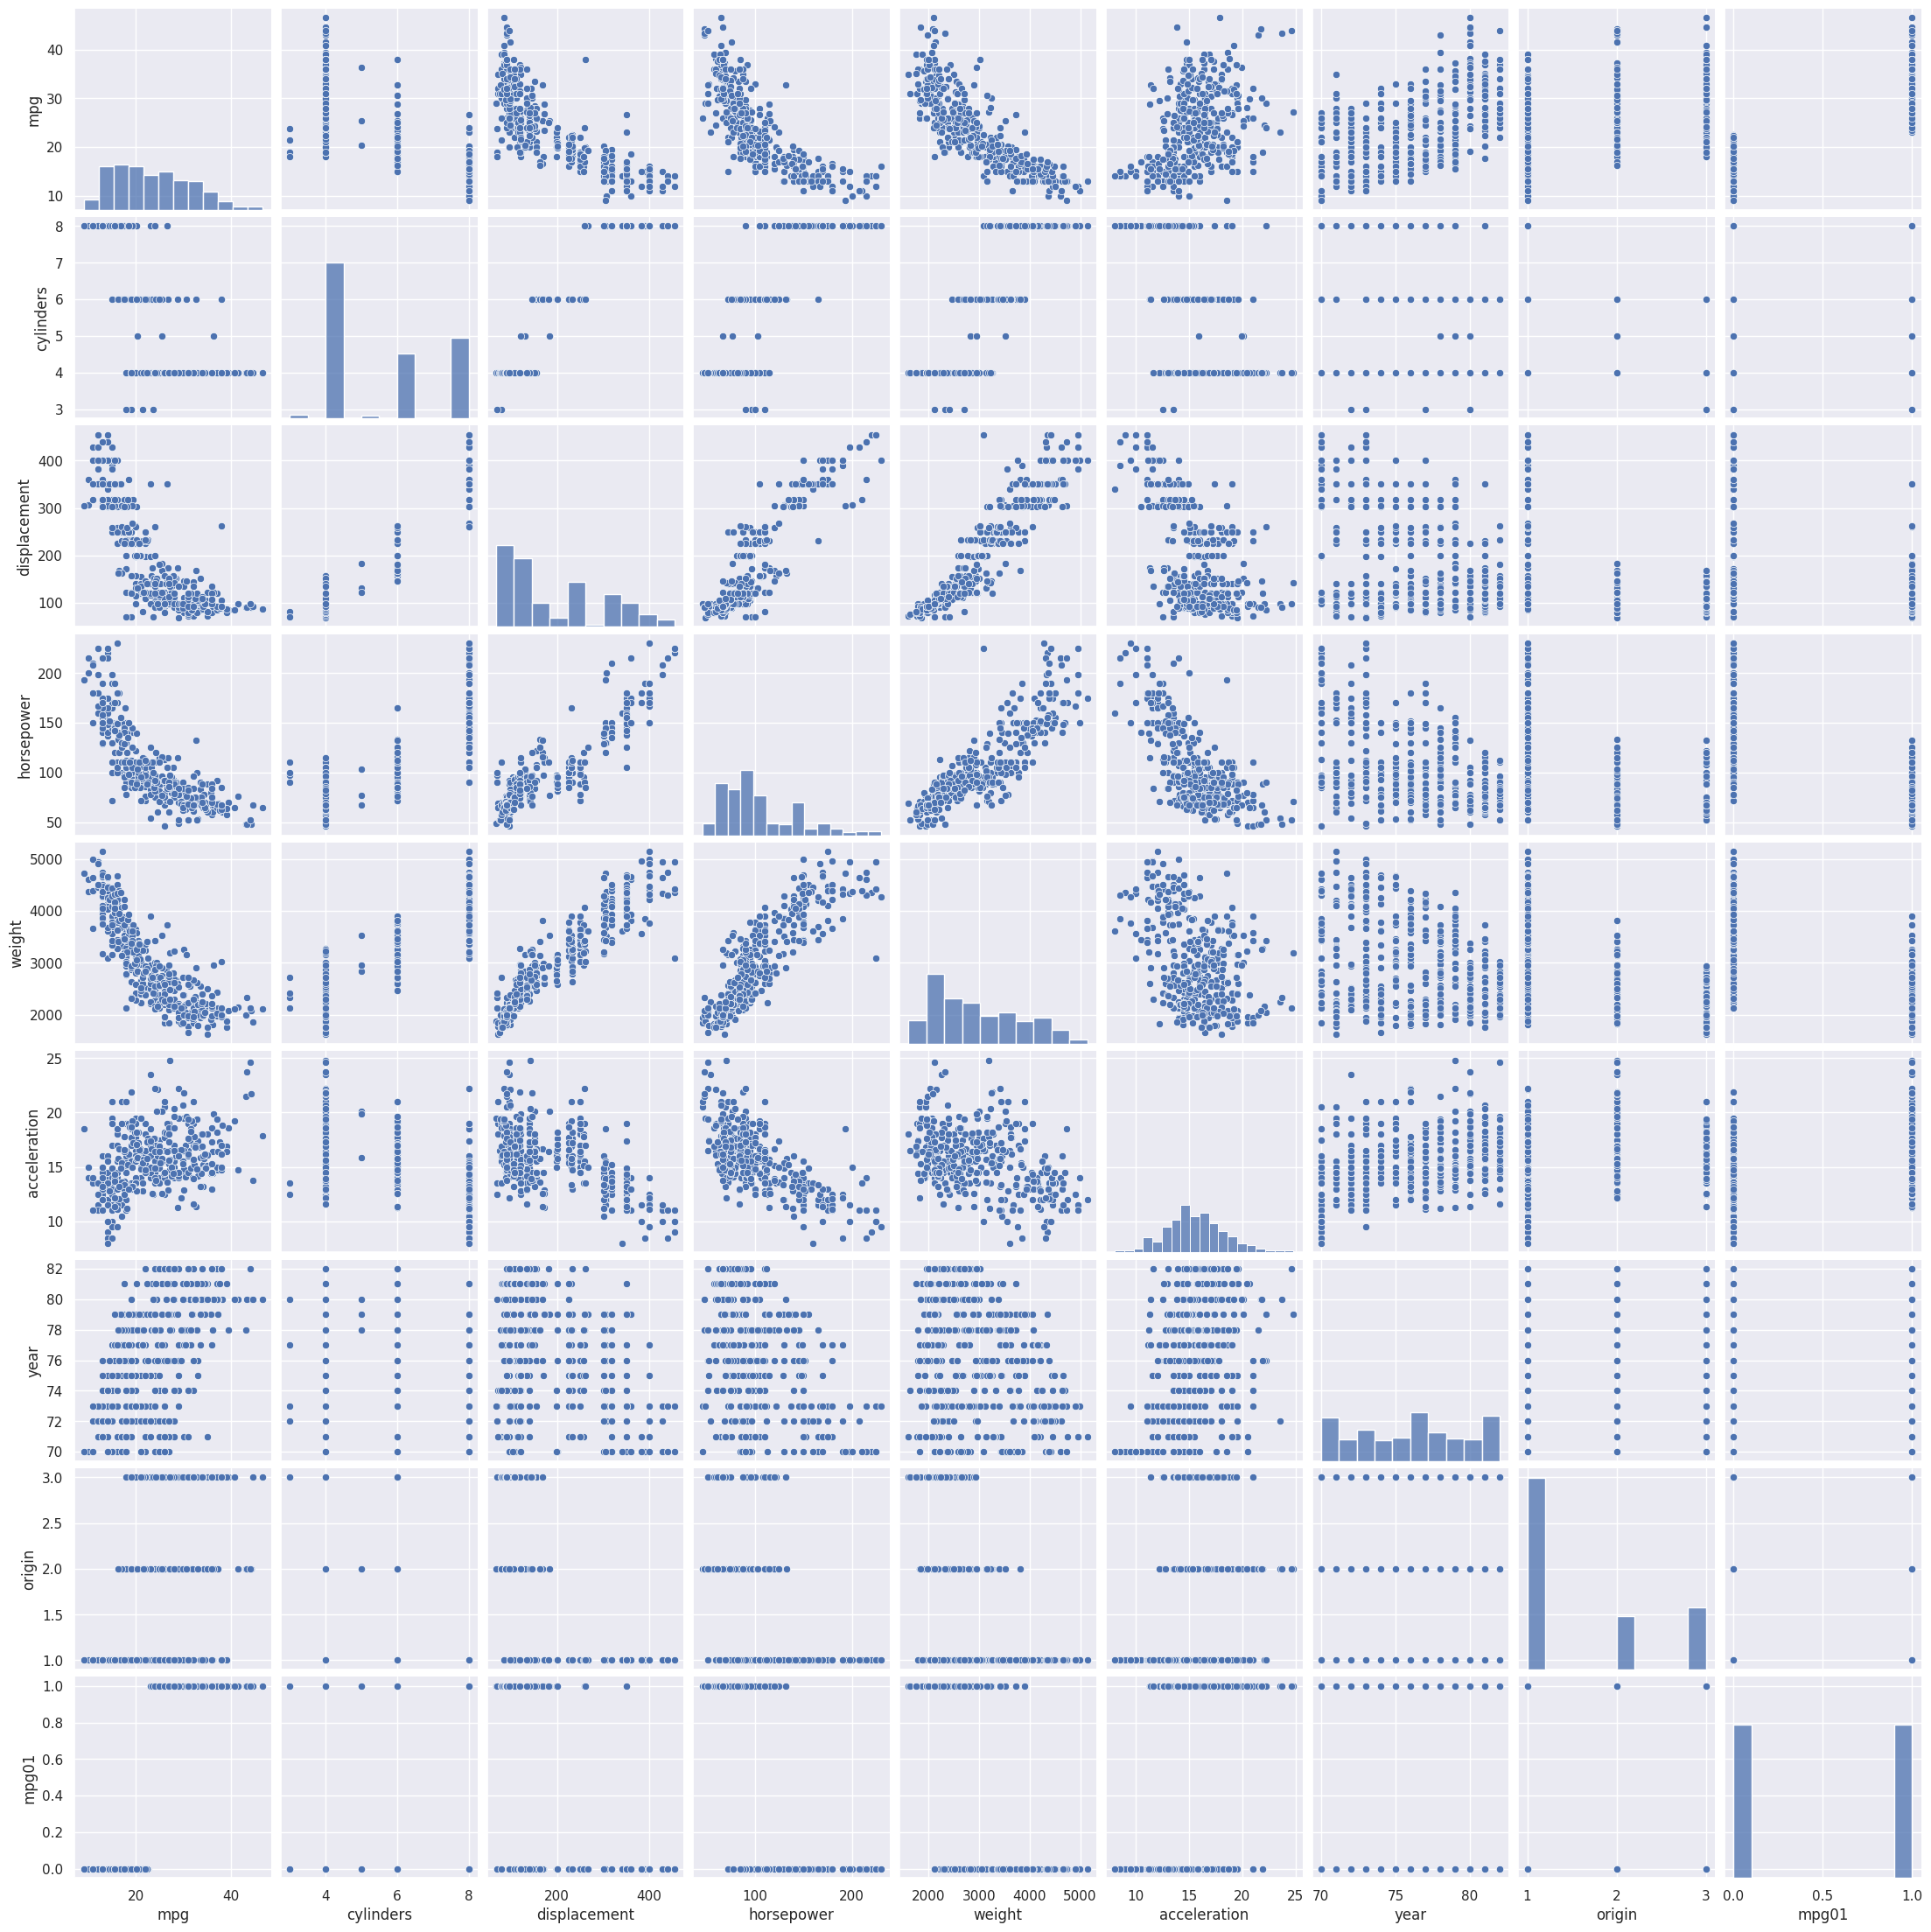

In [17]:
sns.pairplot(Auto)

<Axes: >

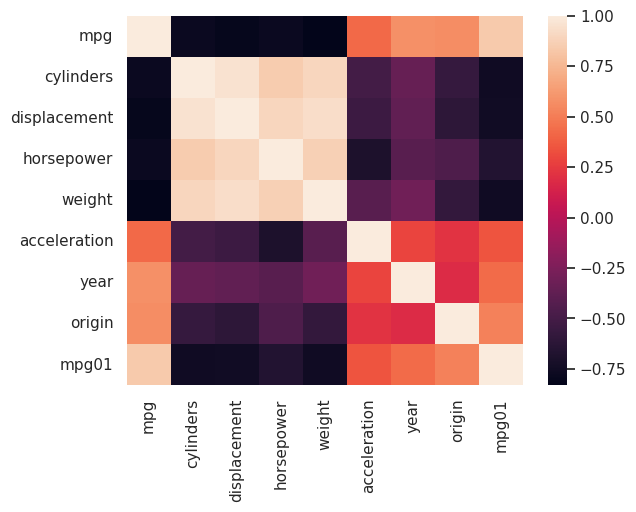

In [19]:
corr = Auto.corr()
sns.heatmap(corr)


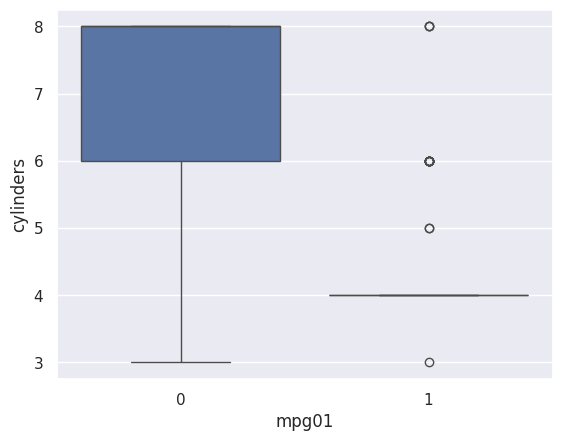

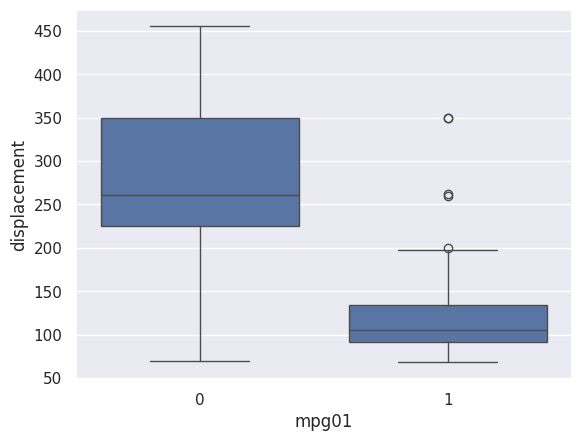

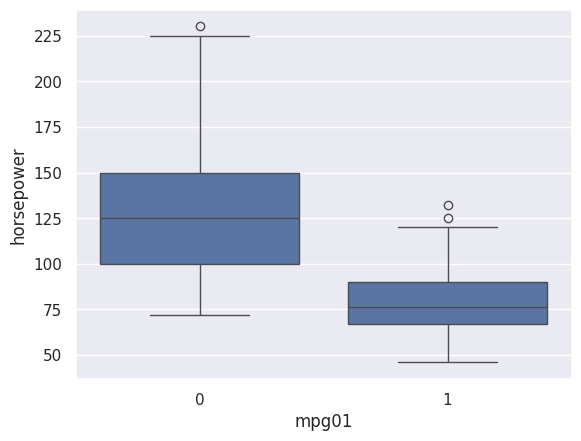

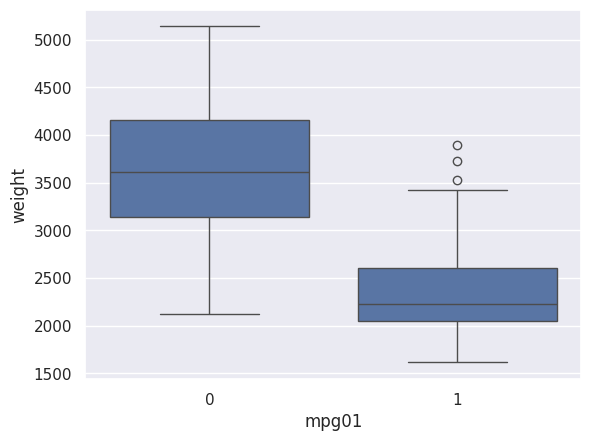

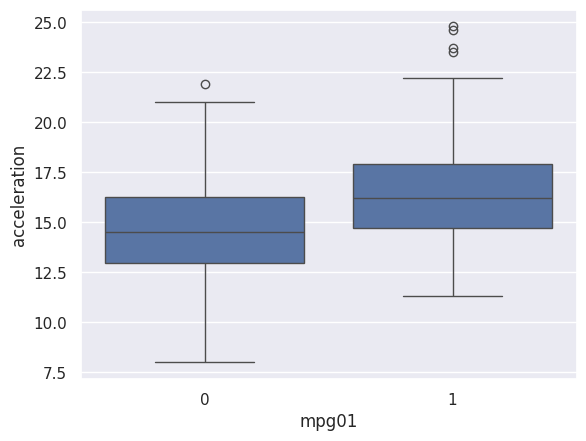

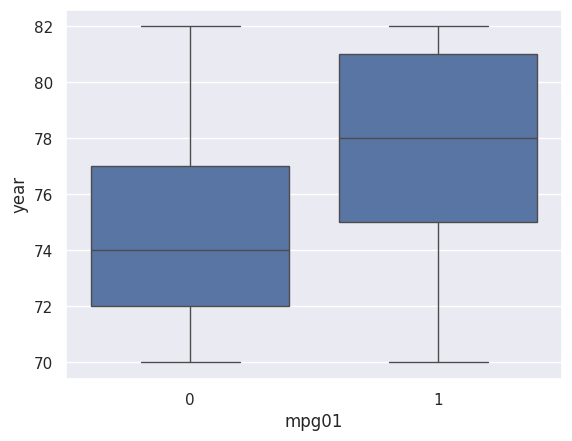

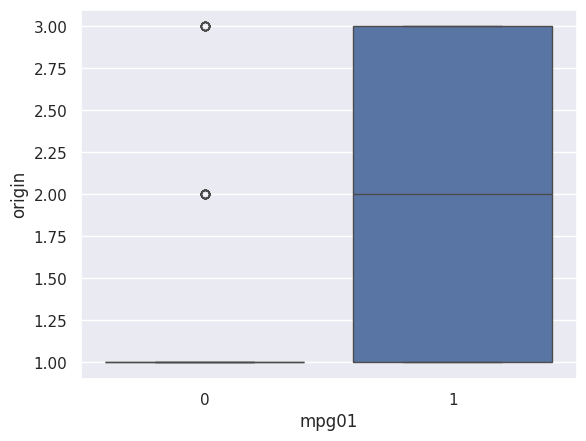

In [21]:
for c in Auto.columns.drop(['mpg01', 'mpg']):
  sns.boxplot(x = Auto['mpg01'], y = Auto[c])
  plt.show()

### Results

We see a strong correlation between mpg01 with origin, year, and acceleration. This is from the heatmap.

When we use the scatterplot, we see a rough correlation between the variables too.

However when we use the boxplot we see a strong relationship between mpg01 and weight, horsepower, and displacement

## (c) - Split the data into a training set and a test set.

In [22]:
Auto.year.min()

70

In [23]:
Auto.year.max()

82

In [24]:
Auto.head()

mpg  cylinders  displacement  horsepower  weight  \
name                                                                           
chevrolet chevelle malibu  18.0          8         307.0         130    3504   
buick skylark 320          15.0          8         350.0         165    3693   
plymouth satellite         18.0          8         318.0         150    3436   
amc rebel sst              16.0          8         304.0         150    3433   
ford torino                17.0          8         302.0         140    3449   

                           acceleration  year  origin  mpg01  
name                                                          
chevrolet chevelle malibu          12.0    70       1      0  
buick skylark 320                  11.5    70       1      0  
plymouth satellite                 11.0    70       1      0  
amc rebel sst                      12.0    70       1      0  
ford torino                        10.5    70       1      0

In [26]:
X_train, X_test, y_train, y_test = train_test_split(Auto[['cylinders','horsepower','weight','acceleration', 'year', 'displacement']], Auto['mpg01'],test_size = 0.2)

In [33]:
print(Auto.shape)
print(Auto['mpg01'].shape)
print(Auto.columns.drop(['mpg', 'origin', 'cylinders']).shape)

(392, 9)
(392,)
(6,)


In [35]:
X_tr1, X_te, y_tr, y_te = train_test_split(Auto[Auto.columns.drop(['mpg', 'origin', 'cylinders'])], Auto['mpg01'], test_size = 0.2)

## (d) - Perform LDA on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?

In [37]:
predictors = ['weight', 'horsepower', 'displacement','cylinders', 'year']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(Auto[predictors], Auto['mpg01'], test_size = 0.2)
print(X_train.shape, X_test.shape)

(313, 5) (79, 5)


In [44]:
lda = LDA()
lda.fit(X_train, y_train)
pred = lda.predict(X_test)
confusion_table(pred, y_test)


Truth       0   1
Predicted        
0          36   3
1           7  33

###Results - Confusion Table LDA


**Baseline: 45.57 %**

**Accuracy Model: 87.34 %**


## (e) - Perform QDA on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?

In [45]:
qda = QDA()
qda.fit(X_train, y_train)
pred= qda.predict(X_test)
confusion_table(pred, y_test)

Truth       0   1
Predicted        
0          39   3
1           4  33

### Results - Confusion Table QDA

**Baseline: 45.57 %**

**Accuracy Model: 91.39 %**

## (f) - Perform logistic regression on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?

In [48]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
confusion_table(pred, y_test)

Truth       0   1
Predicted        
0          39   4
1           4  32

### Results - Confusion Table Logistic Regression

**Baseline: 45.57 %**

**Accuracy Model: 89.87 %**

##(g)Perform naive Bayes on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?

In [49]:
nb = GaussianNB()
nb.fit(X_train, y_train)
pred = nb.predict(X_test)
confusion_table(pred, y_test)

Truth       0   1
Predicted        
0          38   3
1           5  33

### Results - Confusion Table Naive Bayes

**Baseline: 45.57 %**

**Accuracy Model: 89.87 %**

## (h) - Perform KNN on the training data, with several values of K, in order to predict mpg01. Use only the variables that seemed most associated with mpg01 in (b). What test errors do you obtain? Which value of K seems to perform the best on this data set?

In [57]:
for i in range(1, 21):
  knn = KNeighborsClassifier(n_neighbors = i)
  knn.fit(X_train, y_train)
  pred = knn.predict(X_test)
  print(confusion_table(pred, y_test))
  print("K used:", i)
  print("----------------")
  print()

Truth       0   1
Predicted        
0          39   8
1           4  28
K used: 1
----------------

Truth       0   1
Predicted        
0          39  12
1           4  24
K used: 2
----------------

Truth       0   1
Predicted        
0          37   3
1           6  33
K used: 3
----------------

Truth       0   1
Predicted        
0          37   6
1           6  30
K used: 4
----------------

Truth       0   1
Predicted        
0          37   4
1           6  32
K used: 5
----------------

Truth       0   1
Predicted        
0          39   4
1           4  32
K used: 6
----------------

Truth       0   1
Predicted        
0          38   3
1           5  33
K used: 7
----------------

Truth       0   1
Predicted        
0          38   5
1           5  31
K used: 8
----------------

Truth       0   1
Predicted        
0          37   3
1           6  33
K used: 9
----------------

Truth       0   1
Predicted        
0          38   4
1           5  32
K used: 10
----------------


### Results - Confusion Table KNN

Our best results were with K equal to 6,7,11,12. The results are shown below which matches QDA, and Naive Bayes

**Baseline: 45.57 %**

**Accuracy Model: 89.87 %**

## Results Overall

It appears that the parametric relationships better modeled the classification than linear. QDA, Naive Bayes, and KNN all performed relatively the same and relatively well. The best was QDA with the smallest test error. Naiave Bayes and Knn were a close second.

The linear models were mixed. LDA performed the worst so it might seem the data is not as normal as we imagined. Even tho QDA did the best. Linear regression was on par with everything else.

#Question 15 - This problem involves writing functions.

## (a) - Write a function, Power(), that prints out the result of raising 2 to the 3rd power. In other words, your function should compute $2^{3}$ and print out the results.

In [59]:
def powFunc():
  print(pow(2,3))
powFunc

<function __main__.powFunc()>

## (b) - Create a new function, Power2(), that allows you to pass any two numbers, x and a, and prints out the value of x**a.

In [64]:
def powF(base: int, power: int):
  print(base**power)
powF(3,8)

6561


## (c) - Using the Power2() function that you just wrote, compute $10^{3}$,$8^{17}$, and $131^{3}$.

In [67]:
powF(10,3), powF(8,17), powF(131, 3)

1000
2251799813685248
2248091


(None, None, None)

## (d) - Now create a new function, Power3(), that actually returns the result $x**a$ as a Python object, rather than simply printing it to the screen. That is, if you store the value $x**a$ in an object called result within your function, then you can simply return return this result.

In [70]:
def Power3(base: int, power: int) -> int:
  return base**power
Power3

<function __main__.Power3(base: int, power: int) -> int>

## (e) - Now using the Power3() function, create a plot of f(x) = x2. The x-axis should display a range of integers from 1 to 10, and the y-axis should display x2. Label the axes appropriately, and use an appropriate title for the figure. Consider displaying either the x-axis, the y-axis, or both on the log-scale. You can do this by using the ax.set_xscale() and ax.set_yscale() methods of .set_xscale().  .set_yscale() the axes you are plotting to.

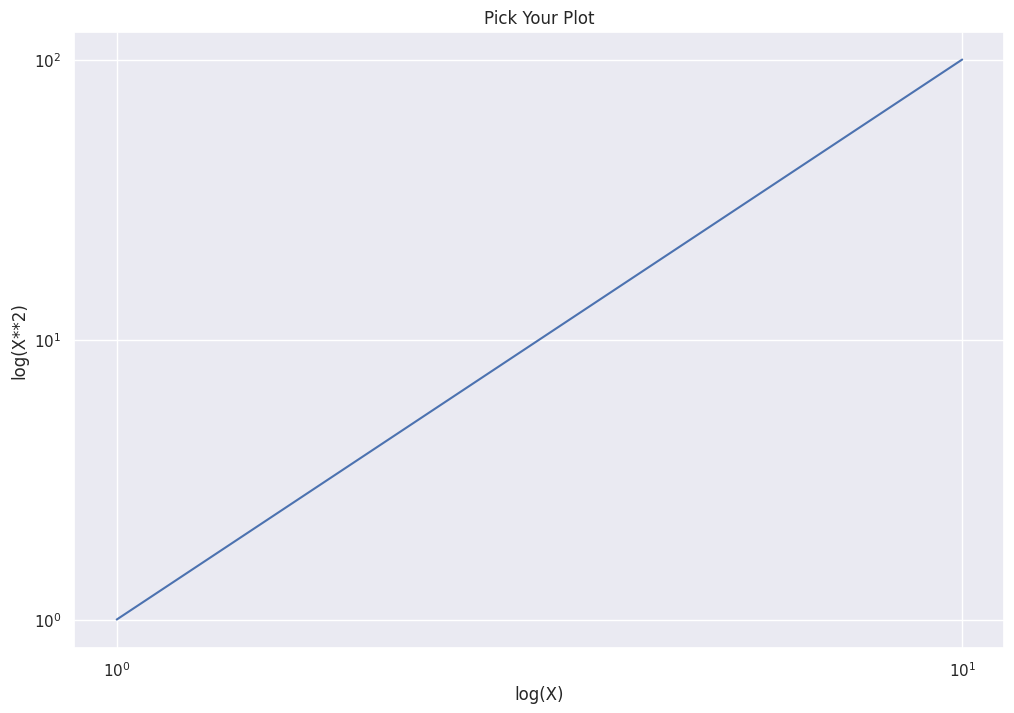

In [73]:
def plot(log = ''):
  X = np.arange(1,11)
  y = Power3(X,2)

  fig, ax = plt.subplots(figsize = (12,8))

  if log == "x":
    ax.set_xscale('log')
    ax.set_xlabel('log_x')
    ax.set_ylabel('X**2')
  elif log =="y":
    ax.set_yscale('log')
    ax.set_ylabel('log_(X**2)')
    ax.set_xlabel('X')
  elif log== 'xy':
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel('log(X)')
    ax.set_ylabel('log(X**2)')
  else:
    ax.set_xlabel("X")
    ax.set_ylabel("X**2")

  ax.plot(X,y)
  plt.title('Pick Your Plot')
plot('xy')


## (f) - Create a function, PlotPower(), that allows you to create a plot of x against x**a for a fixed a and a sequence of values of x.

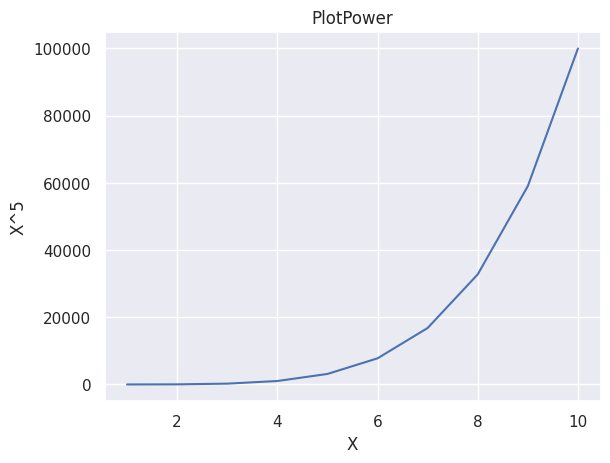

In [75]:
def PlotPower(x, a):
  y = Power3(x,a)
  plt.plot(x,y)
  plt.xlabel('X')
  plt.ylabel('X^' + str(a))
  plt.title('PlotPower')
PlotPower(np.arange(1,11), 5)

# Question 16 - Using the Boston data set, fit classifcation models in order to predict whether a given suburb has a crime rate above or below the median. Explore logistic regression, LDA, naive Bayes, and KNN models using various subsets of the predictors. Describe your fndings.

In [86]:
Boston = load_data('Boston')

In [87]:
Boston.head()

crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

   lstat  medv  
0   4.98  24.0  
1   9.14  21.6  
2   4.03  34.7  
3   2.94  33.4  
4   5.33  36.2

In [88]:
Boston.crim.median()

0.25651

In [89]:
Boston['crim01'] = np.where(Boston['crim'] >= Boston['crim'].median(), 1, 0)
Boston['crim01']

0      0
1      0
2      0
3      0
4      0
      ..
501    0
502    0
503    0
504    0
505    0
Name: crim01, Length: 506, dtype: int64

In [90]:
Boston.drop('crim', axis = 1)


zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  lstat  \
0    18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   4.98   
1     0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   9.14   
2     0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   4.03   
3     0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   2.94   
4     0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   5.33   
..    ...    ...   ...    ...    ...   ...     ...  ...  ...      ...    ...   
501   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273     21.0   9.67   
502   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273     21.0   9.08   
503   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273     21.0   5.64   
504   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273     21.0   6.48   
505   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273     21.0   7.88   

     medv  crim01  
0    24.0       0  
1    21.6       0  
2    34.7       0  
3    33.4       0  
4    36.2       0  
..    ...     ...  
501  22.4       0  
502  20.6       0  
503  23.9       0  
504  22.0       0  
505  11.9       0  

[506 rows x 13 columns]

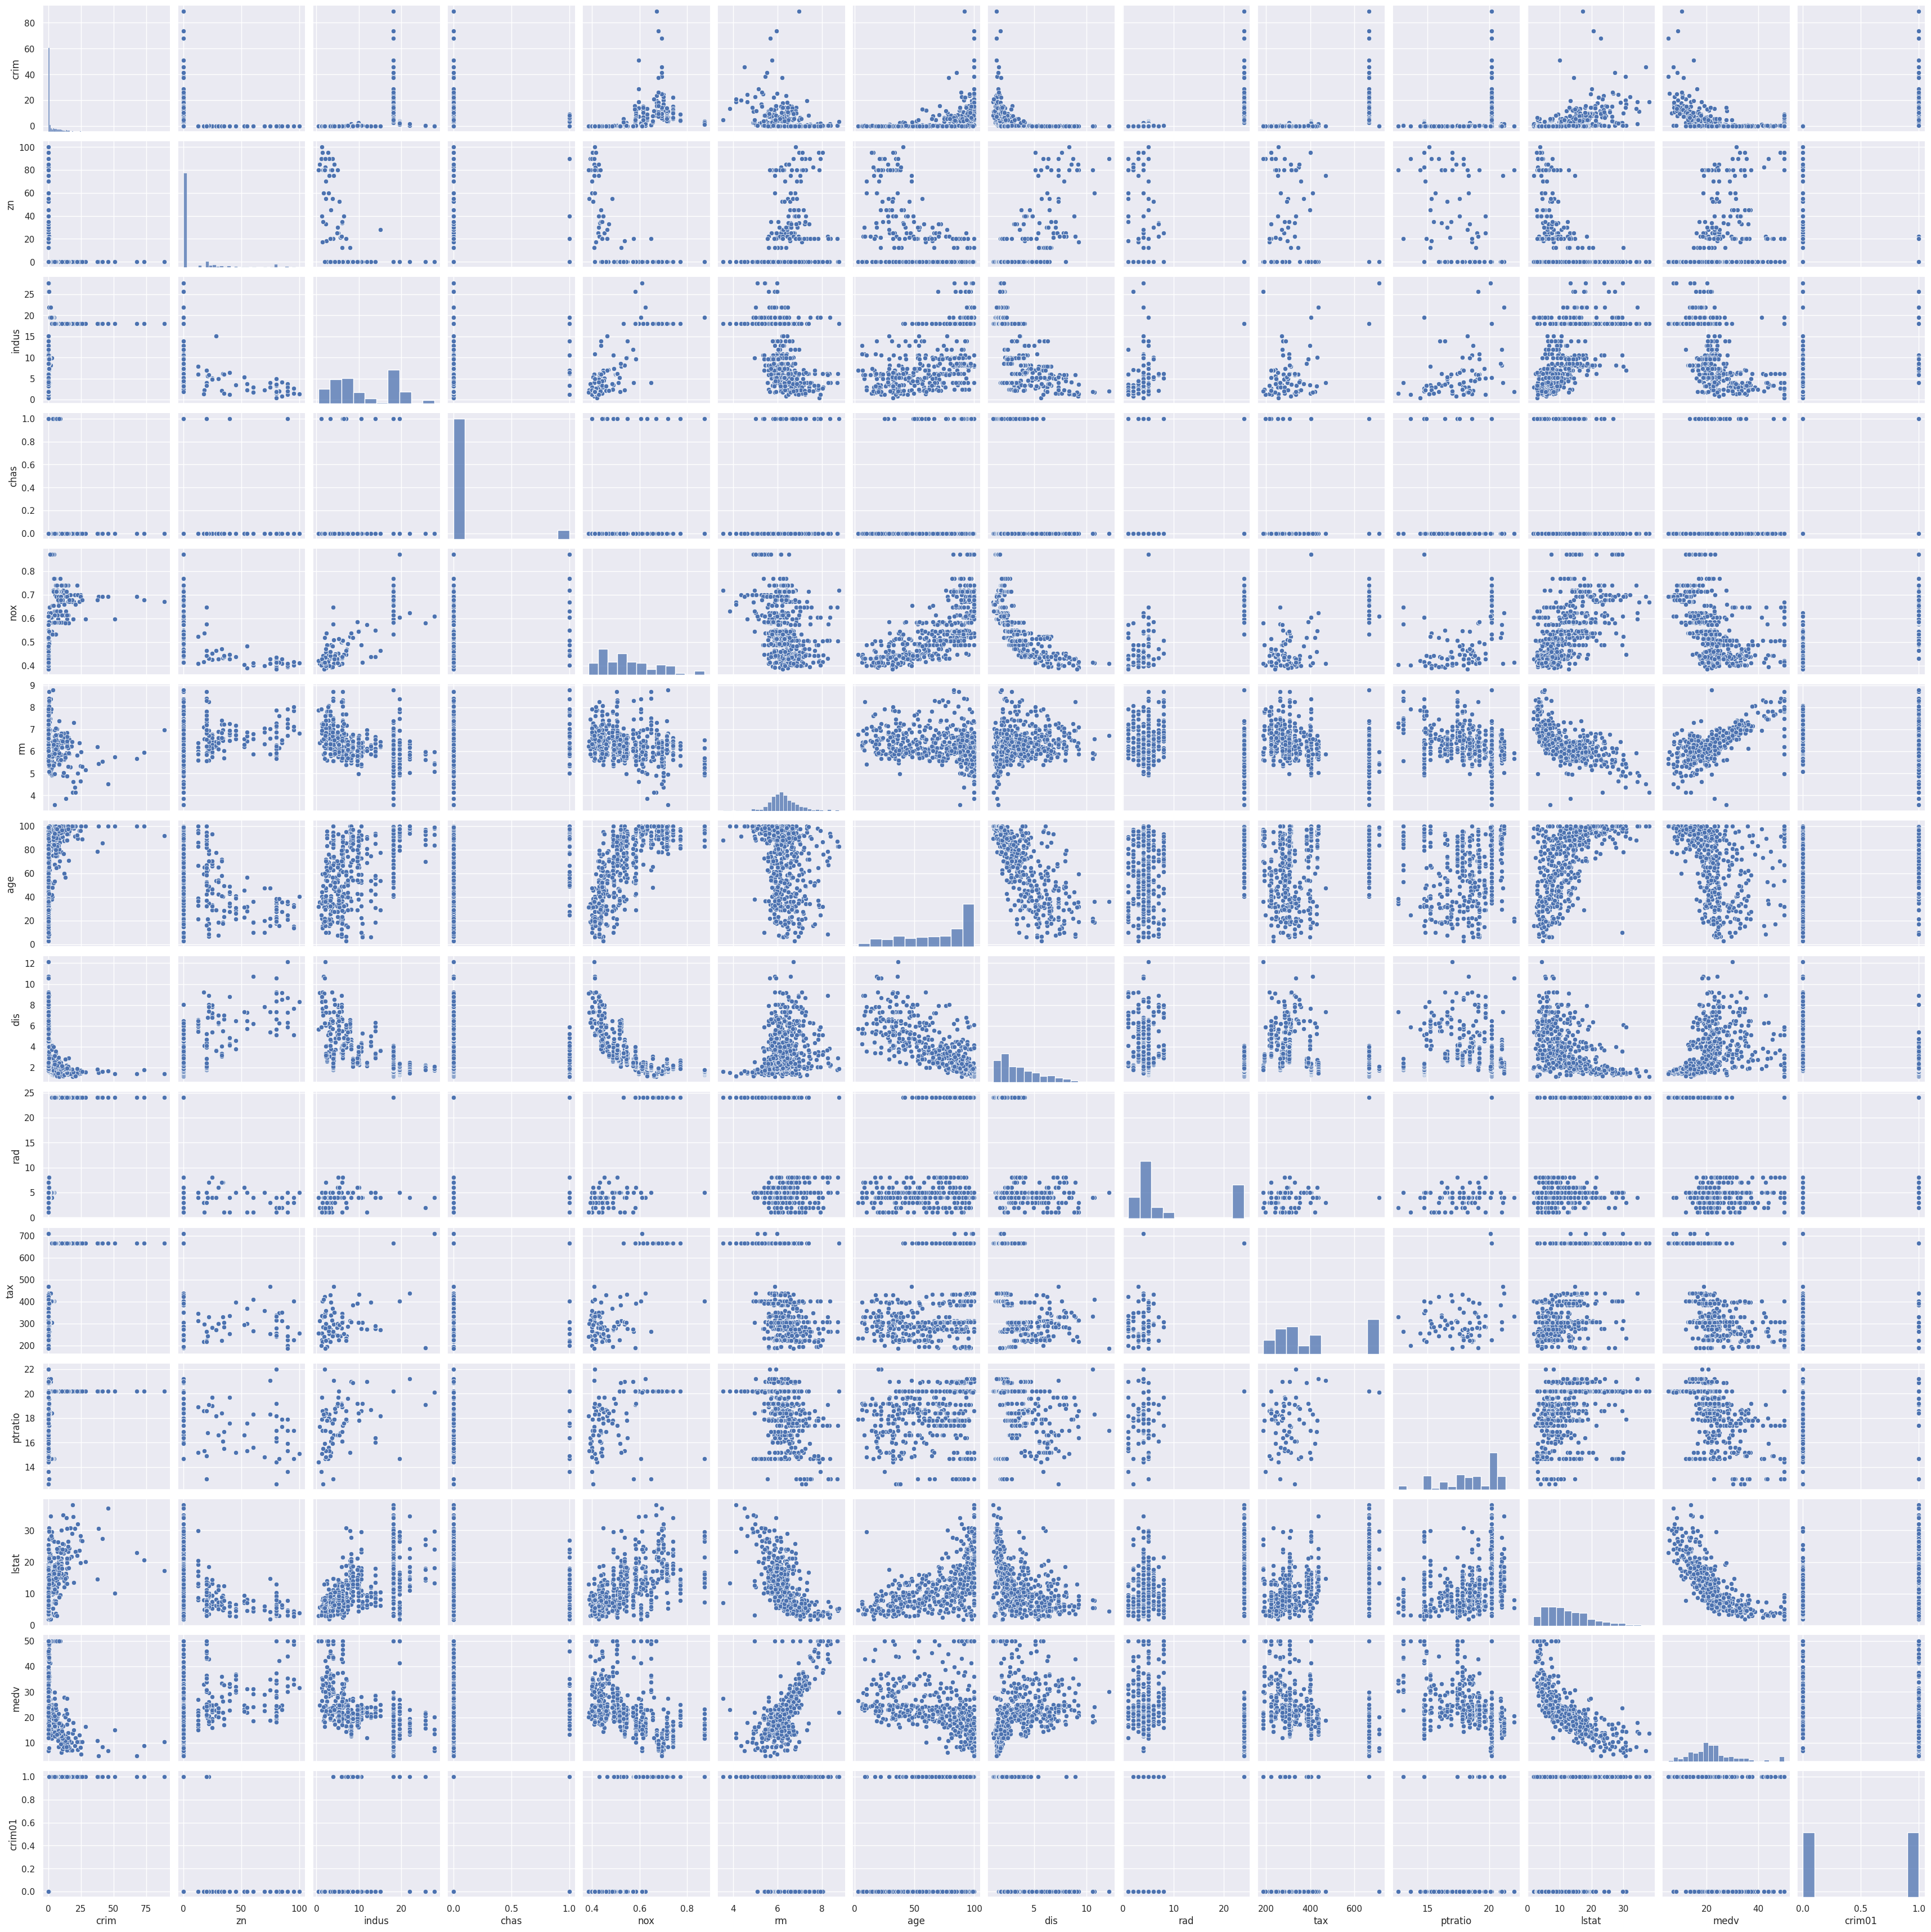

In [91]:
sns.pairplot(Boston)

<Axes: >

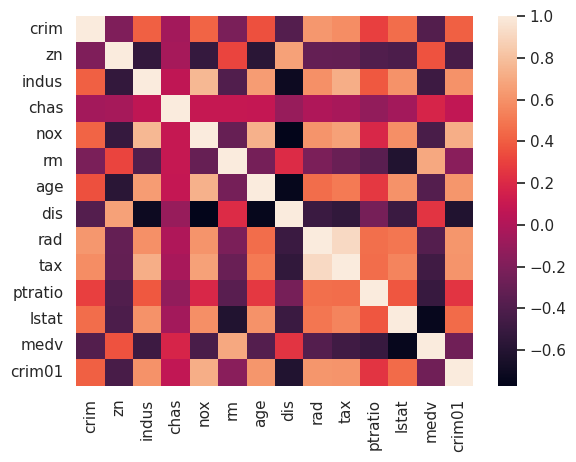

In [92]:
corr = Boston.corr()
sns.heatmap(corr)

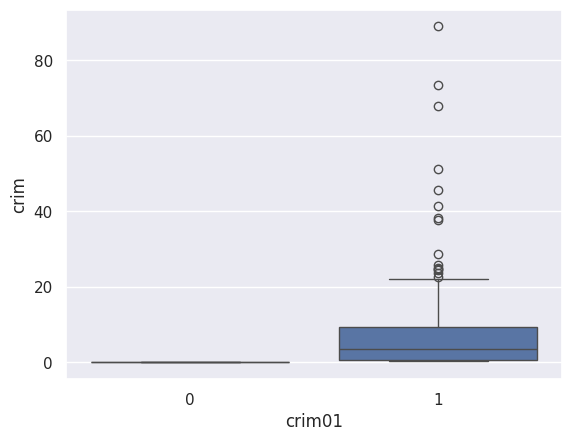

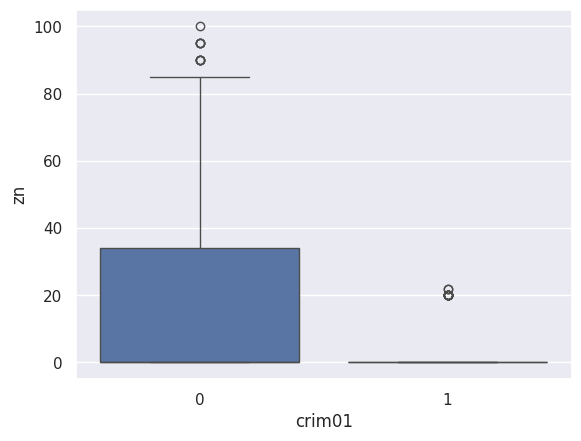

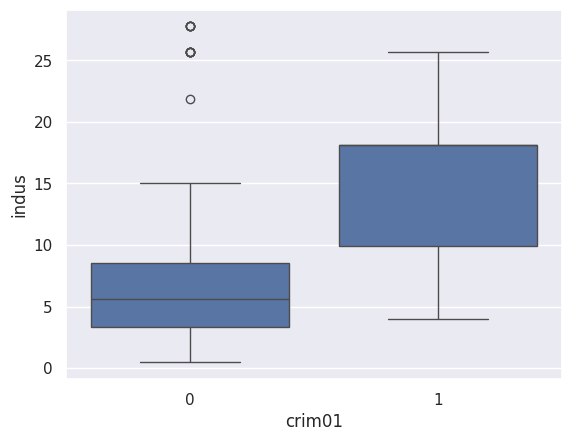

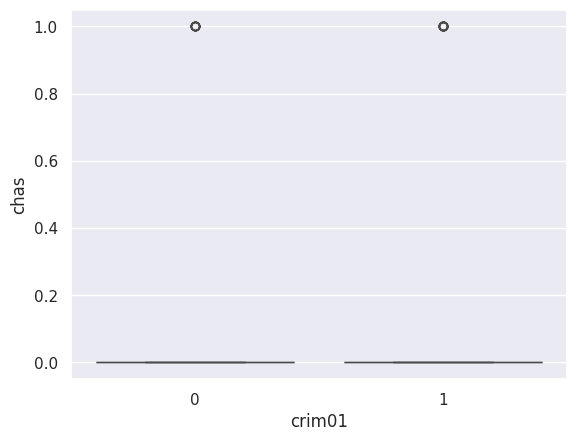

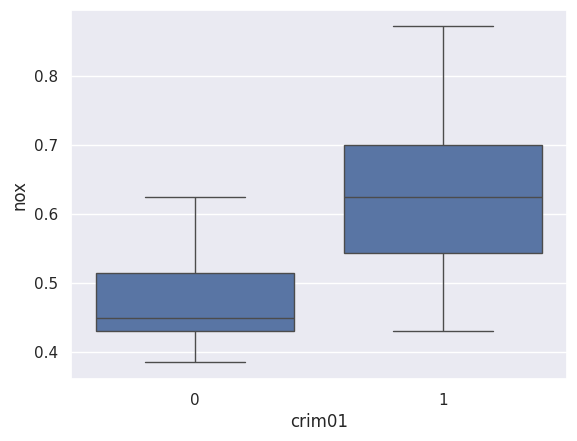

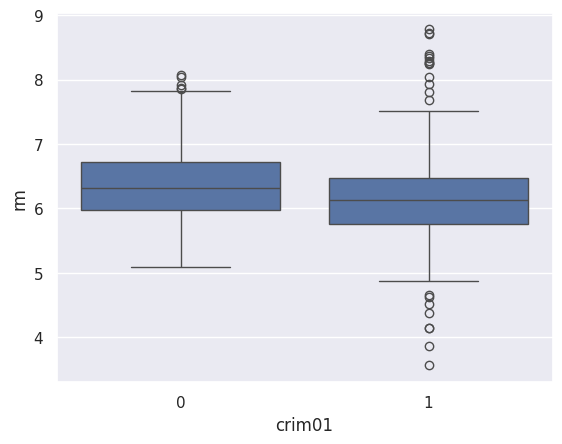

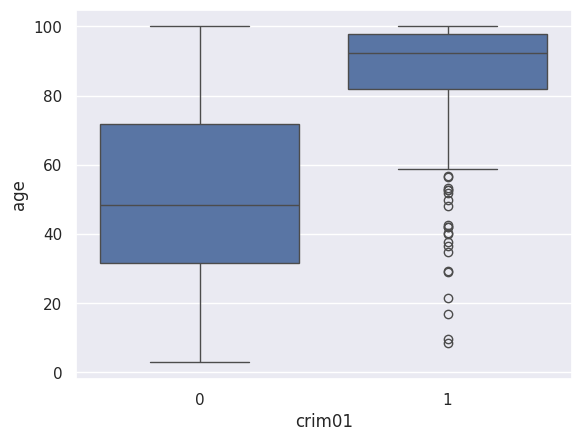

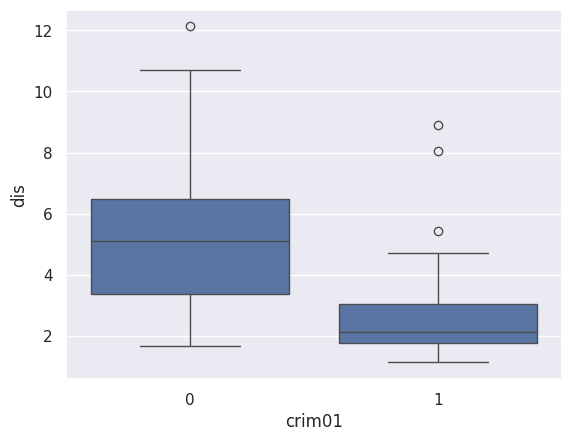

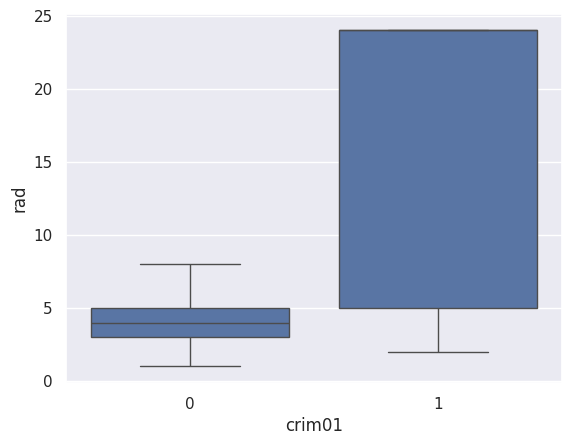

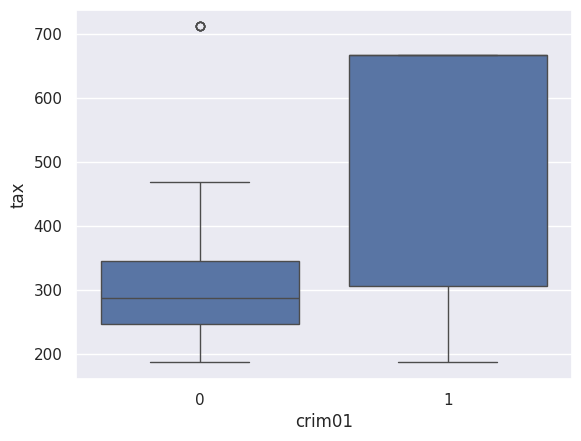

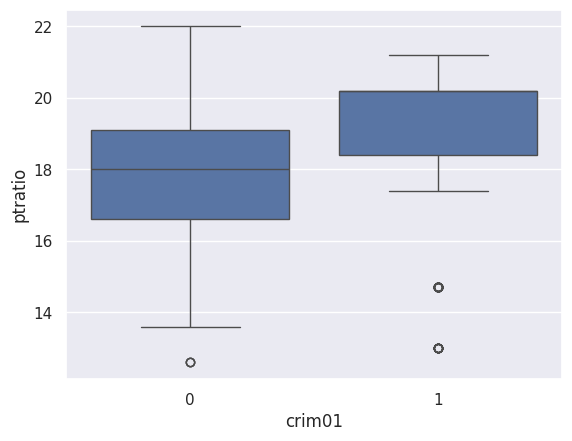

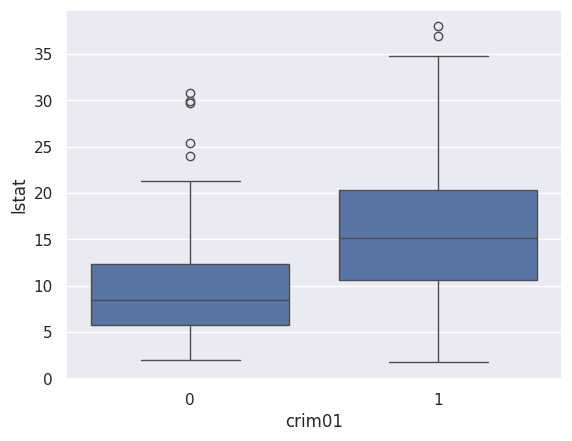

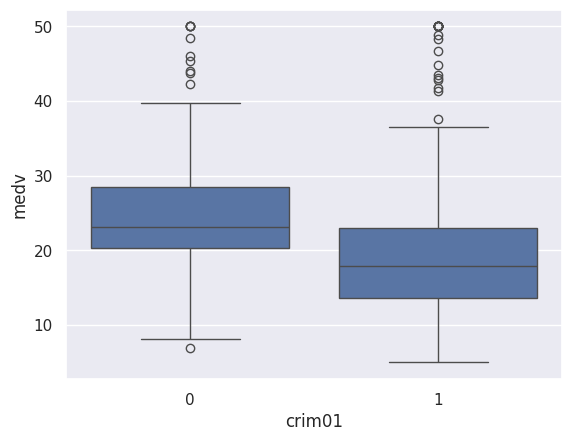

In [94]:
for c in Boston.columns.drop(['crim01']):
  sns.boxplot(x = Boston['crim01'], y = Boston[c])
  plt.show();



In [96]:
predictors = ['medv', 'lstat', 'ptratio', 'tax', 'rad', 'dis', 'age', 'nox', 'indus'] #significant predictors
X_train, X_test, y_train, y_test = train_test_split(Boston[predictors], Boston['crim01'], test_size = 0.2)

In [99]:
#logistic regression
lr = LogisticRegression().fit(X_train, y_train)
pred = lr.predict(X_test)
confusion_table(pred, y_test)



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Truth       0   1
Predicted        
0          46   7
1           6  43

In [100]:
#LDA
lda = LDA()
lda.fit(X_train, y_train)
pred = lda.predict(X_test)
confusion_table(pred, y_test)

Truth       0   1
Predicted        
0          51  10
1           1  40

In [101]:
#QDA
qda = QDA().fit(X_train, y_train)
qda.predict(X_test)
confusion_table(pred, y_test)

Truth       0   1
Predicted        
0          51  10
1           1  40

In [103]:
#Naive Bayes
nb = GaussianNB().fit(X_train, y_train)
pred = nb.predict(X_test)
confusion_table(pred, y_test)


Truth       0   1
Predicted        
0          48  10
1           4  40

In [106]:
for i in range(1, 21):
  knn = KNeighborsClassifier(n_neighbors = i).fit(X_train, y_train)
  pred = knn.predict(X_test)
  print(confusion_table(pred, y_test))
  print(i)
  print("--------------")


Truth       0   1
Predicted        
0          46   1
1           6  49
1
--------------
Truth       0   1
Predicted        
0          51   3
1           1  47
2
--------------
Truth       0   1
Predicted        
0          48   1
1           4  49
3
--------------
Truth       0   1
Predicted        
0          51   2
1           1  48
4
--------------
Truth       0   1
Predicted        
0          51   2
1           1  48
5
--------------
Truth       0   1
Predicted        
0          51   3
1           1  47
6
--------------
Truth       0   1
Predicted        
0          50   3
1           2  47
7
--------------
Truth       0   1
Predicted        
0          50   3
1           2  47
8
--------------
Truth       0   1
Predicted        
0          49   2
1           3  48
9
--------------
Truth       0   1
Predicted        
0          49   3
1           3  47
10
--------------
Truth       0   1
Predicted        
0          48   3
1           4  47
11
--------------
Truth       0   1
P

## Results: Overall

Knn blows everyone out of the water with k = 4,5 with an accuracy of 97.06%. This was the highest out of all the models. QDA and LDA performed the same so we can assume the model is in between quadradic and linear.

Naive Bayes did not perform well so most likely there is a relationship between the variables and the independence is broken.

Logistic Regression fell between Naive and LDA so the data is most likely normal so LDA/QDA do a better job.

I believe the data is normal and has a parametric regression. There is also a ton of n data points relative to a small p so it makes sense that KNN does the best job.